# テキストの統計量

今回の題材は国会（衆議院）の会議録データ<br>
テキストはあらかじめ形態素解析（単語分割）済み

## テキストファイルの読み込みと確認

In [1]:
# ファイル一覧を作成する
import glob
txt_list = glob.glob('diet/189*.txt')

In [3]:
# 文書ごとの単語単位データ
documents = []
# 全文書を1つにまとめた，単語ごとのリスト
all_words = []
# 全文書を1つにまとめた，文ごとのリスト
all_sents = []
# 全文書を1つにまとめた，単語境界のある文字列
all_word_seq = ""
# 全文書を1つにまとめた，単語境界のない文字列
all_texts = ""

# ファイルごとに分けて読み込む
for f in txt_list:
    with open(f, encoding='utf-8') as fh:
        # 一気に全部読み込み（リストに1行ずつ入る）
        t = fh.readlines()
    
    # 行を全部つなげて，改行コードを抜いた上で，単語に分割して，文書ごとに格納
    #documents.append(" ".join(t).replace('\n', '').split())
    # 行を全部つなげて，改行コードを抜いた上で，文書ごとに格納
    documents.append(" ".join(t).replace('\n', ''))
    
    # さらに全データのリスト・変数にも加えておく
    all_words += documents[-1].split()
    all_sents += [ u.replace('\n', '') for u in t ]
    all_word_seq += documents[-1]
    all_texts += documents[-1].replace(' ','')

In [6]:
# ファイル（文書）の数と総文数，総単語数，総文字数
print(len(documents))
print(len(all_sents))
print(len(all_words))
print(len(all_texts))
# ちなみに1文あたりの長さ（単語数）は
print(len(all_words) / len(all_sents))
# そして1単語あたりの長さ（文字数）は
print(len(all_texts) / len(all_words))

44
60057
2602496
4121374
43.333766255390714
1.5836235675290182


In [7]:
# 最初の100単語を見てみる
print(all_words[:100])

['これ', 'より', '会議', 'を', '開き', 'ます', '。', '平成', '二十', '七', '年度', '一般', '会計', '予算', '、', '平成', '二十', '七', '年度', '特別', '会計', '予算', '、', '平成', '二十', '七', '年度', '政府', '関係', '機関', '予算', '、', '以上', '三', '案', 'を', '一括', 'し', 'て', '議題', 'と', 'し', '、', '一般', '的', '質疑', 'を', '行い', 'ます', '。', 'この', '際', '、', 'お', '諮り', 'いたし', 'ます', '。', '三', '案', '審査', 'の', 'ため', '、', '本日', '、', '参考', '人', 'と', 'し', 'て', '東京', '電力', '株式', '会社', '代表', '執行', '役', '社長', '廣瀬', '直己', '君', 'の', '出席', 'を', '求め', '、', '意見', 'を', '聴取', 'し', '、', 'また', '、', '政府', '参考', '人', 'と', 'し', 'て']


In [8]:
# 最初の100文字を見てみる
print(all_texts[:100])

これより会議を開きます。平成二十七年度一般会計予算、平成二十七年度特別会計予算、平成二十七年度政府関係機関予算、以上三案を一括して議題とし、一般的質疑を行います。この際、お諮りいたします。三案審査のた


## 文字と単語の統計

In [10]:
# 標準ライブラリの collections モジュールに，数を数える Counter 関数がある
from collections import Counter

# 文字と単語の種類を数える（結果は辞書 dict 型のようなものである）
char_freq = Counter(all_texts)
word_freq = Counter(all_words)

# 文字と単語の種類数（異なり文字数・単語数や unique characters/words などという）
print(len(char_freq.items()))
print(len(word_freq.items()))

2553
21103


In [11]:
# 多い順に文字と単語を整列
char_freq_sorted = sorted(char_freq.items(), key=lambda x: x[1], reverse=True)
word_freq_sorted = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

In [12]:
# 文字の頻度上位100個を見てみる
print(char_freq_sorted[:100])

[('い', 192027), ('、', 182081), ('の', 142608), ('と', 136241), ('て', 118828), ('に', 99765), ('し', 99594), ('ま', 98112), ('う', 96552), ('で', 92767), ('す', 88588), ('た', 75293), ('る', 70835), ('な', 70036), ('こ', 69773), ('は', 69341), ('を', 66160), ('が', 62420), ('。', 60013), ('か', 57948), ('れ', 57863), ('も', 53659), ('り', 51848), ('っ', 47293), ('ら', 35394), ('お', 33778), ('そ', 33641), ('あ', 31535), ('き', 30585), ('け', 29699), ('ん', 25858), ('だ', 25174), ('ど', 23270), ('く', 21477), ('よ', 21291), ('さ', 20650), ('つ', 18728), ('思', 16346), ('え', 16185), ('わ', 15639), ('大', 14514), ('ざ', 14377), ('ろ', 14304), ('ご', 13858), ('方', 13811), ('一', 13702), ('十', 13410), ('め', 12980), ('ー', 12160), ('や', 11874), ('年', 11136), ('国', 10688), ('地', 10562), ('会', 10466), ('二', 10444), ('せ', 10050), ('上', 9814), ('事', 9719), ('今', 9547), ('中', 8685), ('業', 8653), ('的', 8541), ('本', 8370), ('ば', 8221), ('人', 8081), ('私', 7668), ('ち', 7632), ('行', 7538), ('ふ', 7455), ('ン', 7431), ('対', 7182), ('法', 6952), ('

In [13]:
# 単語の頻度上位100個を見てみる
print(word_freq_sorted[:100])

[('、', 181946), ('の', 114077), ('て', 111441), ('に', 95184), ('と', 88546), ('を', 66160), ('で', 63486), ('は', 62802), ('。', 60013), ('が', 55432), ('ます', 50638), ('いう', 45369), ('し', 38649), ('も', 37256), ('た', 36754), ('こと', 27443), ('な', 22621), ('か', 21923), ('まし', 21051), ('です', 19290), ('ない', 16767), ('ん', 16435), ('いる', 16234), ('から', 15582), ('ござい', 12809), ('これ', 12538), ('おり', 12503), ('する', 12093), ('あり', 11484), ('よう', 10820), ('れ', 10694), ('お', 10433), ('この', 10075), ('さ', 10034), ('けれど', 9758), ('ある', 9713), ('思い', 9582), ('その', 9386), ('だ', 8094), ('そう', 7892), ('たい', 7784), ('つい', 7767), ('それ', 7711), ('的', 7536), ('い', 7495), ('私', 7453), ('もの', 6890), ('一', 6872), ('御', 6462), ('わけ', 6263), ('ふう', 6231), ('今', 6186), ('ところ', 6160), ('方', 6001), ('中', 5720), ('こう', 5464), ('ば', 5456), ('者', 5405), ('考え', 5109), ('大臣', 5103), ('なっ', 4995), ('年', 4804), ('いく', 4641), ('いただき', 4576), ('いっ', 4234), ('二十', 4233), ('いたし', 4121), ('十', 4071), ('二', 4021), ('また', 3915), ('ませ', 37

(0.0, 100.0)

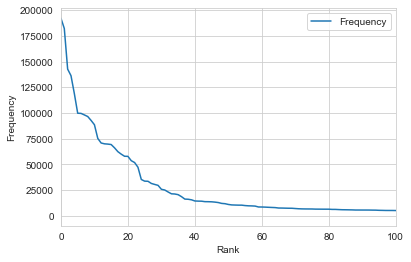

In [14]:
# プロットもしてみる
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

# まず文字について
# データフレームに変換
cf = DataFrame(char_freq_sorted)
cf.columns = ["Character", "Frequency"]

# プロット
cf.plot()
plt.xlabel('Rank')
plt.ylabel('Frequency')
# わかりにくいので上位100個に制限する
plt.xlim([0,100])

(0.0, 100.0)

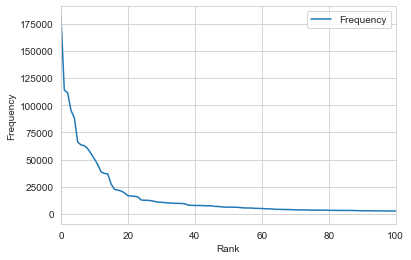

In [15]:
# 次に単語について
# データフレームに変換
wf = DataFrame(word_freq_sorted)
wf.columns = ["Word", "Frequency"]

# プロット
wf.plot()
plt.xlabel('Rank')
plt.ylabel('Frequency')
# わかりにくいので上位100個に制限する
plt.xlim([0,100])

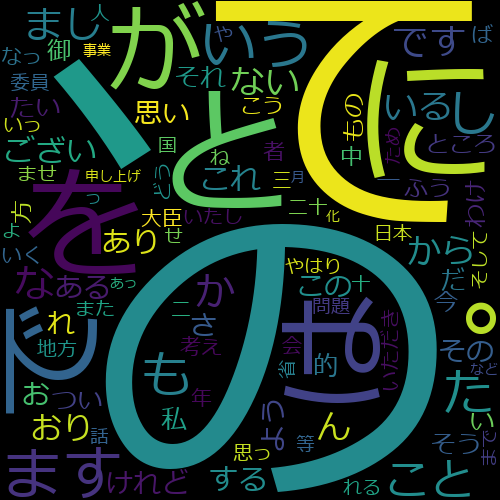

In [16]:
# ワードクラウド
from wordcloud import WordCloud

# 言語によってはフォントを指定する必要がある
font_path = "C:\Windows\Fonts\meiryo.ttc"

# まずは単語の頻度から作成する
# 作るたびに配置や色はランダムに決まる
WordCloud(font_path = font_path,
          # 画像のサイズ
          width = 500, height = 500,
          # 表示する単語数の上限
          max_words = 100
).generate_from_frequencies(word_freq).to_image()

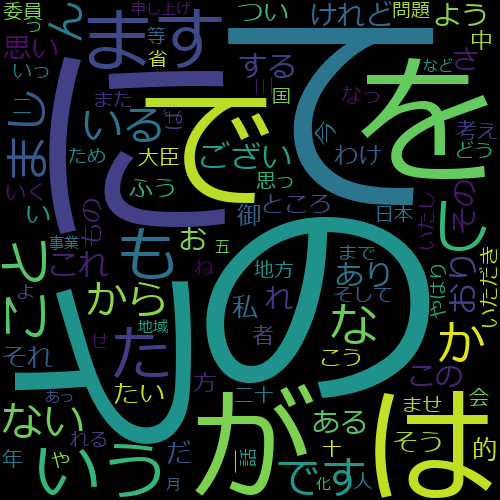

In [17]:
# テキストから直接作ることもできる(generate_from_textメソッドでもよい)
WordCloud(font_path = font_path,
          width = 500, height = 500,
          max_words=100,
          # テキストから作成する場合はデフォルトで2-gramも表示するので，オフにする
          collocations=False
).generate(all_word_seq).to_image()

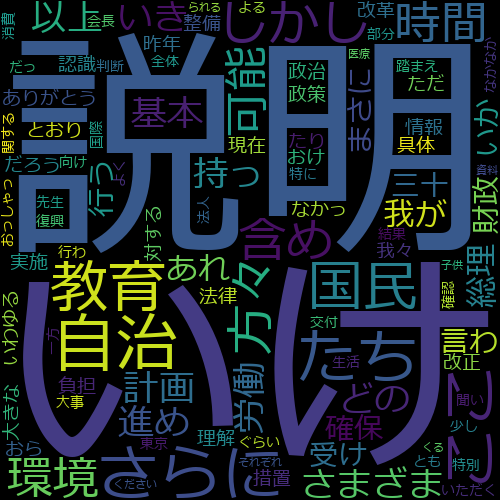

In [21]:
# 助詞などが多いので工夫する

# 高頻度語（ここでは上位200語）をストップワードにする
high_freq_words = list(dict(word_freq_sorted[:200]).keys())

WordCloud(font_path = font_path,
          width = 500, height = 500,
          max_words=100,
          collocations=False,
          # ストップワードは除外する
          stopwords = high_freq_words,
          # 単語の長さの下限（これより短い単語は除外する）
          min_word_length = 2
).generate(all_word_seq).to_image()

## N-gram統計量

In [15]:
# N-gramの組み合わせを作る（ここではN=2,3）
char_2grams = list(zip(all_texts[0:], all_texts[1:]))
char_3grams = list(zip(all_texts[0:], all_texts[1:], all_texts[2:]))

word_2grams = list(zip(all_words[0:], all_words[1:]))
word_3grams = list(zip(all_words[0:], all_words[1:], all_words[2:]))

# 確認
print(char_2grams[:5])
print(char_3grams[:5])
print(word_2grams[:5])
print(word_3grams[:5])

[('こ', 'れ'), ('れ', 'よ'), ('よ', 'り'), ('り', '会'), ('会', '議')]
[('こ', 'れ', 'よ'), ('れ', 'よ', 'り'), ('よ', 'り', '会'), ('り', '会', '議'), ('会', '議', 'を')]
[('これ', 'より'), ('より', '会議'), ('会議', 'を'), ('を', '開き'), ('開き', 'ます')]
[('これ', 'より', '会議'), ('より', '会議', 'を'), ('会議', 'を', '開き'), ('を', '開き', 'ます'), ('開き', 'ます', '。')]


In [16]:
# N-gramを数える
char_2grams_freq = Counter(char_2grams)
char_3grams_freq = Counter(char_3grams)
word_2grams_freq = Counter(word_2grams)
word_3grams_freq = Counter(word_3grams)

# N-gramの種類数
print(len(char_2grams_freq.items()))
print(len(char_3grams_freq.items()))
print(len(word_2grams_freq.items()))
print(len(word_3grams_freq.items()))

97224
494609
233672
776931


In [17]:
# 多い順に整列
char_2grams_freq_sorted = sorted(char_2grams_freq.items(), key=lambda x: x[1], reverse=True)
char_3grams_freq_sorted = sorted(char_3grams_freq.items(), key=lambda x: x[1], reverse=True)
word_2grams_freq_sorted = sorted(word_2grams_freq.items(), key=lambda x: x[1], reverse=True)
word_3grams_freq_sorted = sorted(word_3grams_freq.items(), key=lambda x: x[1], reverse=True)

In [18]:
# 頻度上位10個を見てみる
char_2grams_freq_sorted[0:10]

[(('ま', 'す'), 50788),
 (('い', 'う'), 45385),
 (('し', 'て'), 43596),
 (('と', 'い'), 39944),
 (('す', '。'), 36459),
 (('て', 'い'), 36195),
 (('い', 'ま'), 28134),
 (('こ', 'と'), 27889),
 (('っ', 'て'), 26672),
 (('り', 'ま'), 26622)]

In [19]:
char_3grams_freq_sorted[0:10]

[(('と', 'い', 'う'), 37503),
 (('ま', 'す', '。'), 32189),
 (('い', 'ま', 'す'), 23283),
 (('り', 'ま', 'す'), 19247),
 (('う', 'こ', 'と'), 15702),
 (('て', 'い', 'る'), 15468),
 (('い', 'う', 'こ'), 15276),
 (('ご', 'ざ', 'い'), 12809),
 (('ざ', 'い', 'ま'), 12809),
 (('し', 'て', '、'), 12406)]

In [20]:
word_2grams_freq_sorted[0:10]

[(('と', 'いう'), 37501),
 (('ます', '。'), 32189),
 (('は', '、'), 23422),
 (('し', 'て'), 23301),
 (('て', '、'), 21227),
 (('て', 'いる'), 15466),
 (('も', '、'), 15325),
 (('いう', 'こと'), 15223),
 (('で', '、'), 13558),
 (('て', 'おり'), 11852)]

In [21]:
word_3grams_freq_sorted[0:10]

[(('と', 'いう', 'こと'), 13754),
 (('て', 'おり', 'ます'), 9954),
 (('けれど', 'も', '、'), 9365),
 (('で', 'ござい', 'ます'), 7822),
 (('に', 'つい', 'て'), 7623),
 (('おり', 'ます', '。'), 7574),
 (('と', '思い', 'ます'), 7103),
 (('まし', 'て', '、'), 6962),
 (('と', 'し', 'て'), 6820),
 (('ござい', 'ます', '。'), 6766)]

## 共起頻度

In [19]:
from itertools import combinations

# 共起のリスト
co_occur = {}

# 文ごとに，文の中で共起している単語を数える
for s in all_sents:
    for c in combinations(s.split(" "), 2):
        # 同じ単語の場合，または先ほどのストップワードがある場合は無視する
        if c[0] == c[1] or c[0] in high_freq_words or c[1] in high_freq_words:
            continue
        if c in co_occur:
            co_occur[c] += 1
        else:
            co_occur[c] = 1

KeyboardInterrupt: 

In [23]:
# 共起した組の総数
print(len(co_occur))

# 多い順に整列して表示（上位100個）
co_occur_sorted = sorted(co_occur.items(), key=lambda x: x[1], reverse=True)
co_occur_sorted[:100]

3054539


[(('自治', '体'), 1392),
 (('官', '君'), 1068),
 (('官房', '君'), 1063),
 (('おけ', 'る'), 946),
 (('審議', '君'), 872),
 (('君', '官'), 867),
 (('局長', '君'), 862),
 (('君', '官房'), 855),
 (('君', '局長'), 808),
 (('内閣', '君'), 797),
 (('君', '審議'), 773),
 (('原子', '力'), 661),
 (('君', '庁'), 566),
 (('博', '友'), 555),
 (('道', '府'), 507),
 (('自動', '車'), 499),
 (('都', '府'), 480),
 (('都', '道'), 470),
 (('参考', '君'), 468),
 (('官房', '官'), 468),
 (('なきゃ', 'いけ'), 464),
 (('審議', '官'), 442),
 (('君', '聴取'), 434),
 (('君', '出席'), 424),
 (('君', '求め'), 424),
 (('庁', '君'), 414),
 (('官房', '審議'), 410),
 (('内閣', '官房'), 409),
 (('君', '異議'), 406),
 (('本日', '君'), 403),
 (('君', '存じ'), 403),
 (('厚生', '労働'), 403),
 (('君', '説明'), 396),
 (('いか', 'いけ'), 384),
 (('公務', '員'), 371),
 (('可能', 'エネルギー'), 371),
 (('再生', 'エネルギー'), 364),
 (('内閣', '府'), 363),
 (('小', '規模'), 359),
 (('局', '君'), 352),
 (('君', '環境'), 350),
 (('君', '部長'), 345),
 (('内閣', '官'), 345),
 (('官', '官房'), 345),
 (('再生', '可能'), 337),
 (('君', '国土'), 333),
 (('部長', '君'), 330),
 (('

## TF-IDF

In [24]:
# TF-IDFはscikit-learnで計算できる
from sklearn.feature_extraction.text import TfidfVectorizer

# TfidfVectorizerには細かいオプションがいろいろある
vectorizer = TfidfVectorizer(lowercase=False, token_pattern='(?u)\\b\\w+\\b', norm=None)

# 文書ごとに分かれているテキストデータでTF-IDFを計算
tfidf = vectorizer.fit_transform(documents).toarray()

In [25]:
# 出現した単語を取り出す（使用されている単語の集合を語彙 vocabulary という）
vocab = vectorizer.get_feature_names_out()

# 単語の種類数を確認
# この関数は句読点を単語境界と見なしてしまうため，句読点は単語に含まれず，
# また句読点を含む単語が分割されるため，単語の種類数が上記のCounterによる場合と異なる
print(len(vocab))

# 単語の一覧を確認（はじめの100個）
print(vocab[:100])

21088
['々' '〇' 'あ' 'ああ' 'あい' 'あいち' 'あいつ' 'あいりん' 'あえい' 'あえて' 'あおっ' 'あおら' 'あおり'
 'あおる' 'あか' 'あかし' 'あからさま' 'あき' 'あきれ' 'あく' 'あくせく' 'あくまで' 'あぐら' 'あけ' 'あける'
 'あげ' 'あげく' 'あげつらう' 'あげる' 'あげれ' 'あさって' 'あざ' 'あした' 'あしなが' 'あす' 'あずかっ'
 'あずから' 'あずかり' 'あずかる' 'あずかれ' 'あぜ道' 'あそこ' 'あたかも' 'あたっ' 'あたり' 'あちこち' 'あちら'
 'あちらこちら' 'あっ' 'あっけ' 'あっさり' 'あっせん' 'あったか' 'あっち' 'あっちこっち' 'あつ' 'あつせん'
 'あてはまる' 'あと' 'あながち' 'あなた' 'あの' 'あふれ' 'あふれる' 'あぶれ' 'あべ' 'あま' 'あまた' 'あまねく'
 'あめ' 'あやかっ' 'あやふや' 'あら' 'あらあら' 'あらかじめ' 'あらためて' 'あらゆる' 'あられ' 'あらわさ' 'あらわし'
 'あらわす' 'あらわせる' 'あらわれ' 'あらわれる' 'あり' 'ありあり' 'ありか' 'ありがた' 'ありがたい' 'ありがたかっ'
 'ありがたく' 'ありがと' 'ありがとう' 'ありさま' 'ありてい' 'ありのまま' 'ある' 'あるいは' 'あるか' 'あれ']


In [26]:
# IDFを確認する

# まず単語とそのIDFを組にしておく，辞書にもしておく
idf = list(zip(vectorizer.get_feature_names_out(), vectorizer.idf_))
idf_dict = dict(idf)

# IDFの値で並び替えもしておく
idf_sorted = sorted(idf, key=lambda x: x[1])

# はじめの10個
idf_sorted[:10]

[('あっ', 1.0),
 ('あり', 1.0),
 ('ありがとう', 1.0),
 ('ある', 1.0),
 ('あるいは', 1.0),
 ('い', 1.0),
 ('いい', 1.0),
 ('いう', 1.0),
 ('いか', 1.0),
 ('いき', 1.0)]

In [27]:
# 最後の10個
idf_sorted[-10:]

[('ｂｙ', 4.113515309210374),
 ('ｄ', 4.113515309210374),
 ('ｅｍｕ', 4.113515309210374),
 ('ｈ', 4.113515309210374),
 ('ｉ', 4.113515309210374),
 ('ｊｐ', 4.113515309210374),
 ('ｎｅ', 4.113515309210374),
 ('ｐａｒｔ', 4.113515309210374),
 ('ｓｐｍｏｄｅ', 4.113515309210374),
 ('ｔｏ', 4.113515309210374)]

In [28]:
# 1つ目の文書について観察してみる
# まず，IDFと同様に単語とTF-IDFを組にする
tfidf0 = list(zip(vectorizer.get_feature_names_out(), tfidf[0]))

tfidf0_sorted = sorted(tfidf0, key=lambda x: x[1], reverse=True)

# はじめの100個
print(tfidf0_sorted[:100])

[('の', 3803.0), ('て', 3441.0), ('に', 2986.0), ('と', 2859.0), ('で', 2201.0), ('は', 2129.0), ('を', 2106.0), ('が', 1706.0), ('ます', 1654.0), ('いう', 1480.0), ('た', 1210.0), ('し', 1208.0), ('も', 1153.0), ('こと', 912.0), ('な', 651.0), ('か', 638.0), ('ない', 588.0), ('まし', 575.0), ('です', 536.0), ('いる', 480.0), ('ん', 464.0), ('から', 459.0), ('おり', 433.0), ('あり', 424.0), ('これ', 409.0), ('お', 379.0), ('この', 378.0), ('れ', 360.0), ('よう', 349.0), ('思い', 347.0), ('ござい', 346.0), ('さ', 337.0), ('その', 325.0), ('ある', 308.0), ('けれど', 307.76432961146963), ('する', 304.0), ('私', 276.0), ('だ', 273.0), ('大臣', 273.0), ('一', 271.0), ('者', 256.0), ('方', 250.0), ('今', 248.0), ('つい', 237.0), ('たい', 233.0), ('的', 228.0), ('そう', 223.0), ('ふう', 221.87660971989672), ('御', 219.0), ('い', 217.0), ('それ', 211.0), ('もの', 211.0), ('年', 201.0), ('そして', 170.0), ('中', 170.0), ('事業', 166.0), ('ば', 164.0), ('わけ', 163.0), ('考え', 162.0), ('いたし', 160.0), ('二十', 157.0), ('十', 153.0), ('なっ', 149.0), ('放送', 147.11565733770647), ('こう', 146.0)

In [29]:
# たとえば「東電」について計算してみると…
t = Counter(documents[0].split())['東電']
i = idf_dict['東電']

# TF・IDF・TF-IDFは
print(t)
print(i)
print(t*i)

# TFとIDFの積になっていることが確認できる

43
2.2417131323087833
96.39366468927768


In [30]:
# なお，TfidfVectorizerの出力はそれぞれの文書について同じ（単語の種類数）次元のベクトルとして
# 出力するので，一種のベクトル空間モデルになっている
tfidf.shape

(44, 21088)

## 分散表現

In [31]:
# gensimをインポート
import gensim
import gensim.downloader

In [32]:
# 2つのベクトルのコサイン類似度を計算する関数を定義しておく
def cos_sim(v1, v2):
    return np.dot(v1, v2) / np.linalg.norm(v1) / np.linalg.norm(v2)

In [33]:
# gensimには分散表現のモデルが用意されていて，ダウンロードして使用できる

# 用意されているモデルの情報はこのようにして得ることができる
# gensim.downloader.info()['models']

# ひとまずモデルの名前だけ取得する
list(gensim.downloader.info()['models'].keys())

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

In [34]:
# ここでは Twitter から学習した25次元のGloVeモデル（英語）を使用することにする
#（サイズが約100MBで比較的小さなモデルであるため）
gensim.downloader.info()['models']['glove-twitter-25']

{'num_records': 1193514,
 'file_size': 109885004,
 'base_dataset': 'Twitter (2B tweets, 27B tokens, 1.2M vocab, uncased)',
 'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/glove-twitter-25/__init__.py',
 'license': 'http://opendatacommons.org/licenses/pddl/',
 'parameters': {'dimension': 25},
 'description': 'Pre-trained vectors based on 2B tweets, 27B tokens, 1.2M vocab, uncased (https://nlp.stanford.edu/projects/glove/).',
 'preprocessing': 'Converted to w2v format with `python -m gensim.scripts.glove2word2vec -i <fname> -o glove-twitter-25.txt`.',
 'read_more': ['https://nlp.stanford.edu/projects/glove/',
  'https://nlp.stanford.edu/pubs/glove.pdf'],
 'checksum': '50db0211d7e7a2dcd362c6b774762793',
 'file_name': 'glove-twitter-25.gz',
 'parts': 1}

In [35]:
# モデルのダウンロードと読み込み（しばらく時間がかかる）
# もし他の大きなモデルを使う場合は，必要な時間もメモリも増えるので注意すること
glove_tw = gensim.downloader.load('glove-twitter-25')

In [36]:
# 語彙（約120万単語ある）
glove_tw_vocab = list(glove_tw.key_to_index.keys())
print(len(glove_tw_vocab))
# 最初の100単語
glove_tw_vocab[:100]

1193514


['<user>',
 '.',
 ':',
 'rt',
 ',',
 '<repeat>',
 '<hashtag>',
 '<number>',
 '<url>',
 '!',
 'i',
 'a',
 '"',
 'the',
 '?',
 'you',
 'to',
 '(',
 '<allcaps>',
 '<elong>',
 ')',
 'me',
 'de',
 '<smile>',
 '！',
 'que',
 'and',
 '。',
 '-',
 'my',
 'no',
 '、',
 'is',
 'it',
 '…',
 'in',
 'n',
 'for',
 '/',
 'of',
 'la',
 "'s",
 '*',
 'do',
 "n't",
 'that',
 'on',
 'y',
 "'",
 'e',
 'o',
 'u',
 'en',
 'this',
 'el',
 'so',
 'be',
 "'m",
 'with',
 'just',
 '>',
 'your',
 '^',
 'like',
 'have',
 'te',
 'at',
 '？',
 'love',
 'se',
 'are',
 '<',
 'm',
 'r',
 'if',
 'all',
 'b',
 '・',
 'not',
 'but',
 'we',
 'es',
 'ya',
 '&',
 'follow',
 'up',
 'what',
 'get',
 'lol',
 'un',
 '♥',
 'lo',
 'when',
 'was',
 '“',
 '”',
 'one',
 'por',
 'si',
 'out']

In [37]:
# 指定した単語と最も類似した単語（デフォルトでは10個を出力）
glove_tw.most_similar('king')

[('prince', 0.9337410926818848),
 ('queen', 0.9202422499656677),
 ('aka', 0.9176921844482422),
 ('lady', 0.9163240790367126),
 ('jack', 0.9147356152534485),
 ("'s", 0.9066898822784424),
 ('stone', 0.8982375264167786),
 ('mr.', 0.8919409513473511),
 ('the', 0.8893438577651978),
 ('star', 0.8892088532447815)]

In [38]:
# 単語のベクトルを求める
king  = glove_tw.get_vector('king')
queen = glove_tw.get_vector('queen')
man   = glove_tw.get_vector('man')
woman = glove_tw.get_vector('woman')

# ベクトルの次元数
print(glove_tw.vector_size)

# たとえば king のベクトルを表示すると
king

25


array([-0.74501 , -0.11992 ,  0.37329 ,  0.36847 , -0.4472  , -0.2288  ,
        0.70118 ,  0.82872 ,  0.39486 , -0.58347 ,  0.41488 ,  0.37074 ,
       -3.6906  , -0.20101 ,  0.11472 , -0.34661 ,  0.36208 ,  0.095679,
       -0.01765 ,  0.68498 , -0.049013,  0.54049 , -0.21005 , -0.65397 ,
        0.64556 ], dtype=float32)

In [39]:
# ベクトルを計算して，類似度をみてみると…
print(cos_sim(king, queen))
print(cos_sim(king - man, queen - woman))
print(cos_sim(king - man + woman, queen))
print(cos_sim(queen - woman + man, king))

0.92024213
0.42987904
0.7530913
0.73100656
